##NAIVE BAYES PROJECT: Prediccion de dianósticos de SOP en mujeres.

###Dataset
Los datos presentan los detalles de 1000 mujeres con su edad, BMI, Regularidad de Periodo Menstrual, Nivel de Testosterona y Antral Follicle. Con esta información se pretende evaluar la decisión de compra
> target = PCOS_Diagnosis

> feactures = Age,  BIM,  Menstrual_Irregularity,
 Testosterone_Level(ng/dL),  Antral_Follicle_Count

In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools
pio.renderers.default = 'colab'
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [3]:
data=pd.read_csv('pcos_dataset.csv')
print(f'data.shape: {data.shape}')
data.head()

data.shape: (1000, 6)


,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,35,1,25,20,0
1,37,26,0,57,25,0
2,32,24,0,93,28,0
3,28,29,0,63,26,0
4,25,22,1,60,8,0


##2. Visualización de Dataset

In [4]:
df=pd.DataFrame(data)
df

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,35,1,25,20,0
1,37,26,0,57,25,0
2,32,24,0,93,28,0
3,28,29,0,63,26,0
4,25,22,1,60,8,0
...,...,...,...,...,...,...
995,34,18,1,96,23,0
996,45,29,1,29,7,0
997,37,28,0,32,28,0
998,41,27,0,96,9,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1000 non-null   int64
 1   BMI                        1000 non-null   int64
 2   Menstrual_Irregularity     1000 non-null   int64
 3   Testosterone_Level(ng/dL)  1000 non-null   int64
 4   Antral_Follicle_Count      1000 non-null   int64
 5   PCOS_Diagnosis             1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


##3. Preparación del Dataset

In [6]:
df.isnull().sum().to_frame('NaN Value').T

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
NaN Value,0,0,0,0,0,0


In [7]:
for col in df:
  print(f"{col}: {df[col].nunique()}")

Age: 28
BMI: 18
Menstrual_Irregularity: 2
Testosterone_Level(ng/dL): 81
Antral_Follicle_Count: 25
PCOS_Diagnosis: 2


In [8]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,31.771,8.463462,18.0,24.0,32.0,39.00,45.0
BMI,1000.0,26.452,4.960272,18.0,22.0,26.0,31.00,35.0
Menstrual_Irregularity,1000.0,0.520,0.499850,0.0,0.0,1.0,1.00,1.0
Testosterone_Level(ng/dL),1000.0,60.216,23.175600,20.0,42.0,60.0,80.00,100.0
Antral_Follicle_Count,1000.0,17.469,7.069301,5.0,12.0,18.0,23.25,29.0
PCOS_Diagnosis,1000.0,0.199,0.399448,0.0,0.0,0.0,0.00,1.0


De acuerdo a las tablas:
- El rango de edades esta entre 18 y 45 años
- La regularidad de menstruación tiene 2 clases 0 o 1, al igual que el diagnóstico final
- El BMI va desde 18 hasta 35
- Los niveles de testosterona es muy amplio.
- El conteo de Antral Follicle esta desde 5 hasta 29


##4. Análisis exploratorio de datos (EDA)

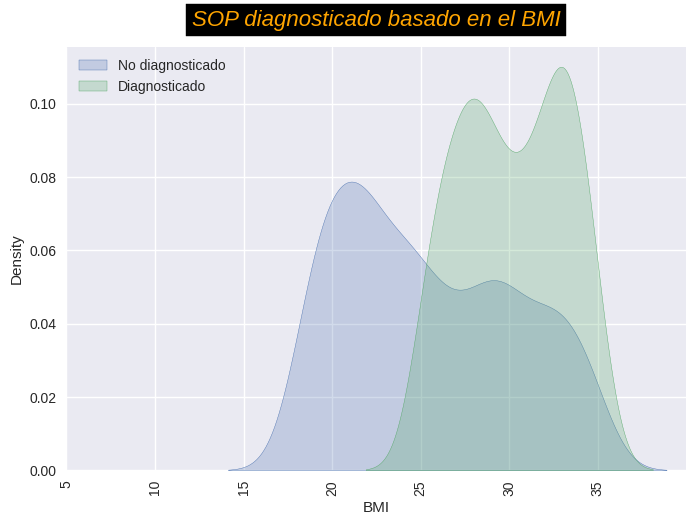

In [9]:
#Revisar el BMI (basado en diagnostico)
import warnings
warnings.filterwarnings('ignore')
font={'fontsize':16, 'fontstyle':'italic', 'backgroundcolor': 'black', 'color':'orange'}
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['PCOS_Diagnosis']==0, 'BMI'], label='No diagnosticado', shade=True)
sns.kdeplot(df.loc[df['PCOS_Diagnosis']==1, 'BMI'], label='Diagnosticado', shade=True)
plt.title('SOP diagnosticado basado en el BMI', fontdict=font, pad=15)
plt.xticks(np.arange(5,40,5), rotation=90)
plt.xlim([5,40])
plt.legend()
plt.show()

**El KDE plot (Kernel Density Estimate plot)** es un gráfico que muestra la densidad de una variable continua. Se usa para visualizar la distribución de los datos de una forma mas suave que un histograma, ya qu ene lugar de agrupar los datos en bins. KDE emplea una función de suavizado (Kernel) para generar una curva continua.

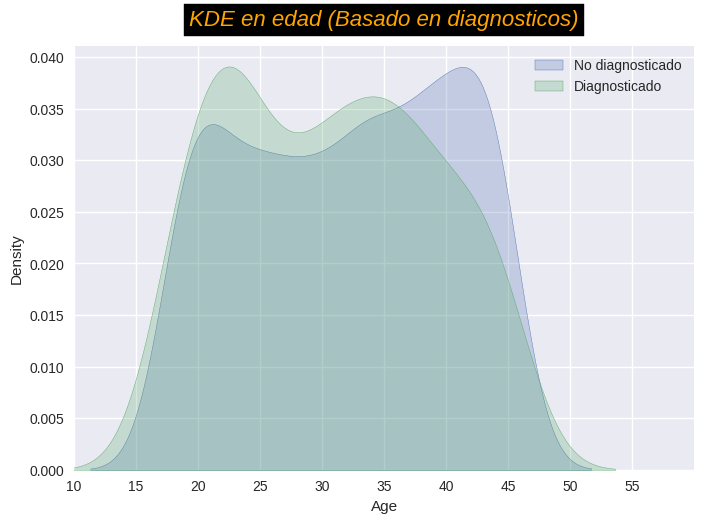

In [10]:
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['PCOS_Diagnosis']==0, 'Age'], label='No diagnosticado', shade=True)
sns.kdeplot(df.loc[df['PCOS_Diagnosis']==1, 'Age'], label='Diagnosticado', shade=True)
plt.title('KDE en edad (Basado en diagnosticos)', fontdict=font, pad=15)
plt.xticks(np.arange(0,60,5))
plt.xlim([10,60])
plt.legend()
plt.show()

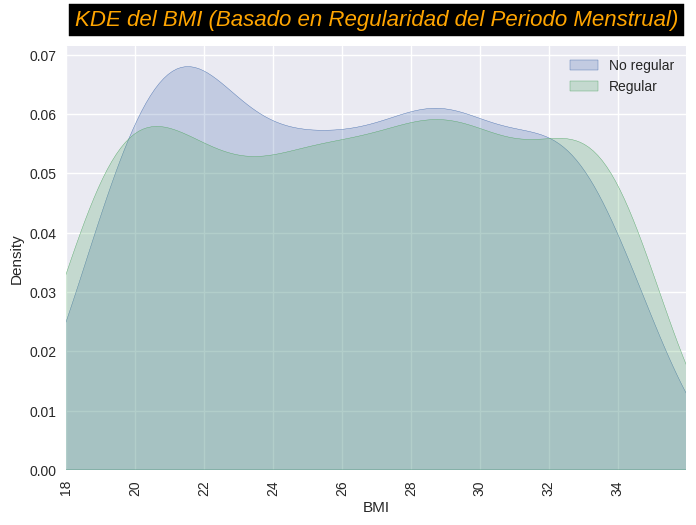

In [11]:
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['Menstrual_Irregularity']==0, 'BMI'], label='No regular', shade=True)
sns.kdeplot(df.loc[df['Menstrual_Irregularity']==1, 'BMI'], label='Regular', shade=True)
plt.title('KDE del BMI (Basado en Regularidad del Periodo Menstrual)', fontdict=font, pad=15)
plt.xticks(np.arange(18,36,2), rotation=90)
plt.xlim([18,36])
plt.legend()
plt.show()

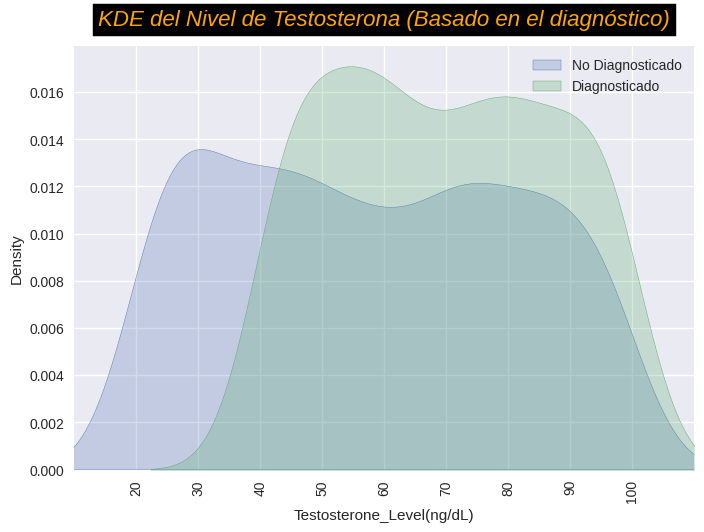

In [12]:
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['PCOS_Diagnosis']==0, 'Testosterone_Level(ng/dL)'], label='No Diagnosticado', shade=True)
sns.kdeplot(df.loc[df['PCOS_Diagnosis']==1, 'Testosterone_Level(ng/dL)'], label='Diagnosticado', shade=True)
plt.title('KDE del Nivel de Testosterona (Basado en el diagnóstico)', fontdict=font, pad=15)
plt.xticks(np.arange(20,101,10), rotation=90)
plt.xlim([10,110])
plt.legend()
plt.show()

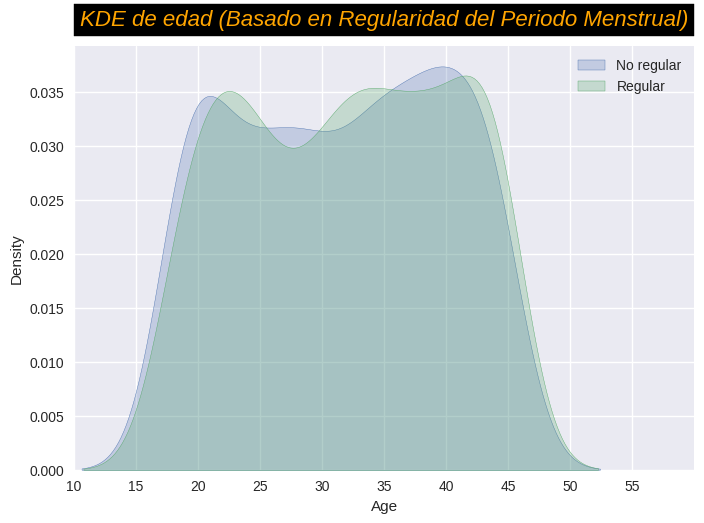

In [13]:
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['Menstrual_Irregularity']==0, 'Age'], label='No regular', shade=True)
sns.kdeplot(df.loc[df['Menstrual_Irregularity']==1, 'Age'], label='Regular', shade=True)
plt.title('KDE de edad (Basado en Regularidad del Periodo Menstrual)', fontdict=font, pad=15)
plt.xticks(np.arange(0,60,5))
plt.xlim([10,60])
plt.legend()
plt.show()

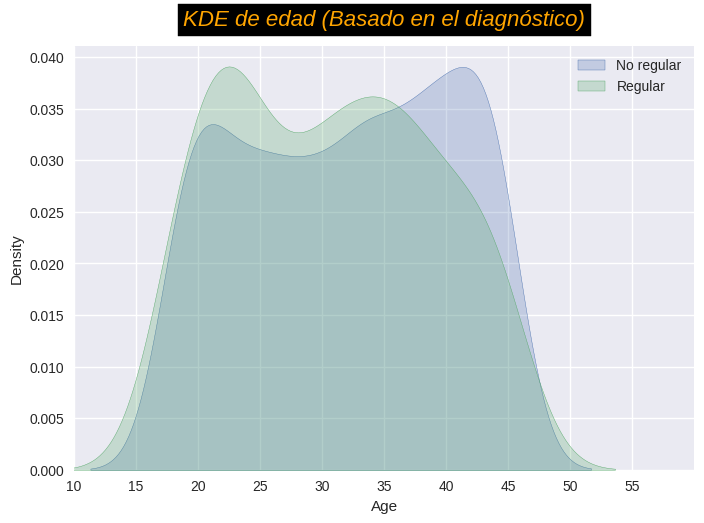

In [14]:
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['PCOS_Diagnosis']==0, 'Age'], label='No regular', shade=True)
sns.kdeplot(df.loc[df['PCOS_Diagnosis']==1, 'Age'], label='Regular', shade=True)
plt.title('KDE de edad (Basado en el diagnóstico)', fontdict=font, pad=15)
plt.xticks(np.arange(0,60,5))
plt.xlim([10,60])
plt.legend()
plt.show()

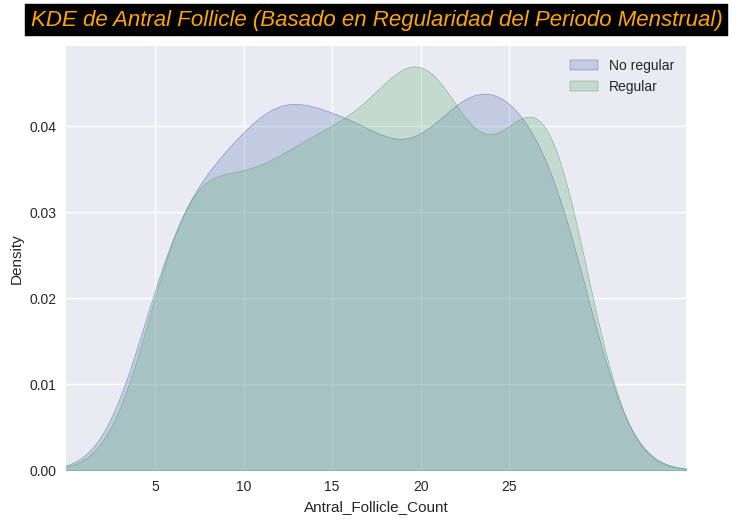

In [15]:
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['Menstrual_Irregularity']==0, 'Antral_Follicle_Count'], label='No regular', shade=True)
sns.kdeplot(df.loc[df['Menstrual_Irregularity']==1, 'Antral_Follicle_Count'], label='Regular', shade=True)
plt.title('KDE de Antral Follicle (Basado en Regularidad del Periodo Menstrual)', fontdict=font, pad=15)
plt.xticks(np.arange(5,30,5))
plt.xlim([0,35])
plt.legend()
plt.show()

De acuerdo con los KDE plots anteriores:
- La mayoría de las mujeres con SOP diagnosticado tienen un BMI mayor a 25
- La edad no es un factor demasiado relevate para el diagnostico.
- El BMI no es un factor determinante para la regularidad del periodo menstrual de las mujeres, pasa el mismo caso con la edad.
- Entre mayor es el Nivel de Testosterona registrado, mayor son los diagnósticos.
- El Antral Follicle no es determinante para la regularidad el periodo menstrual.

##4.1. Análisis univariable

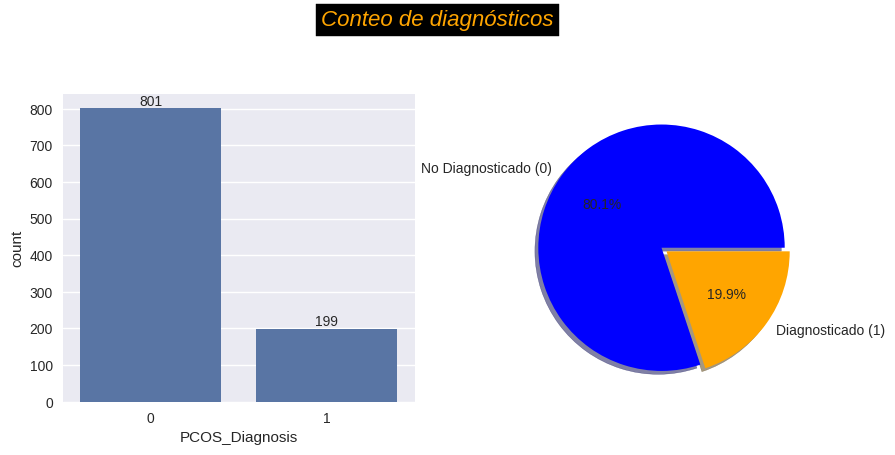

In [16]:
%matplotlib inline
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.countplot(data=df, x='PCOS_Diagnosis', ax=axes[0])
for container in axes[0].containers:
  axes[0].bar_label(container)
slices = df.PCOS_Diagnosis.value_counts().values
activities = ['No Diagnosticado (0)', 'Diagnosticado (1)']
axes[1].pie(slices, labels=activities, colors=['blue', 'orange'], shadow=True, explode=[0,0.05], autopct='%1.1f%%')
plt.suptitle('Conteo de diagnósticos', y=1.09, **font)
plt.show()

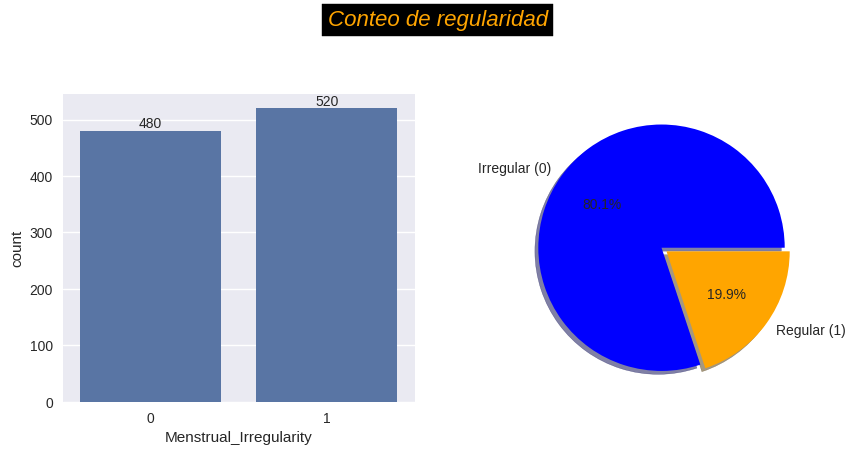

In [17]:
%matplotlib inline
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.countplot(data=df, x='Menstrual_Irregularity', ax=axes[0])
for container in axes[0].containers:
  axes[0].bar_label(container)
slices = df.PCOS_Diagnosis.value_counts().values
activities = ['Irregular (0)', 'Regular (1)']
axes[1].pie(slices, labels=activities, colors=['blue', 'orange'], shadow=True, explode=[0,0.05], autopct='%1.1f%%')
plt.suptitle('Conteo de regularidad', y=1.09, **font)
plt.show()

##4.2. Análisis Bivariable.

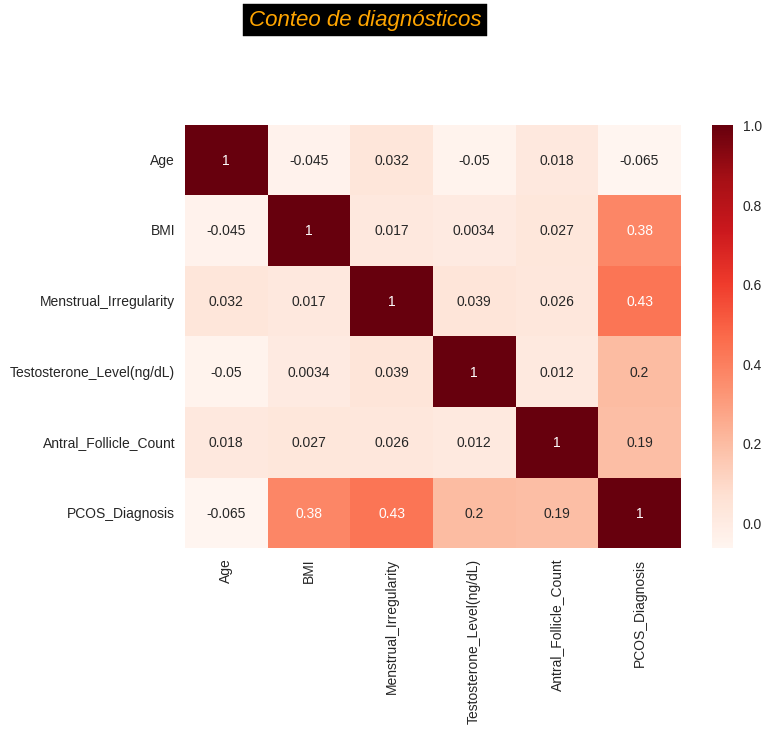

In [18]:
%matplotlib inline
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.suptitle('Conteo de diagnósticos', y=1.09, x=0.35, **font)
plt.show()

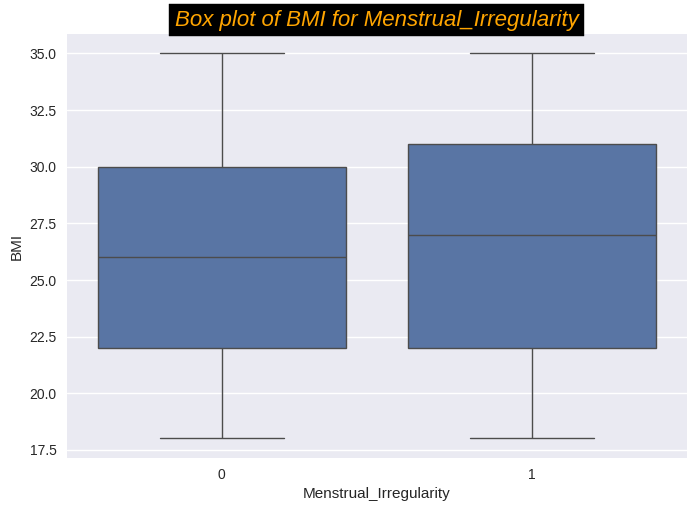

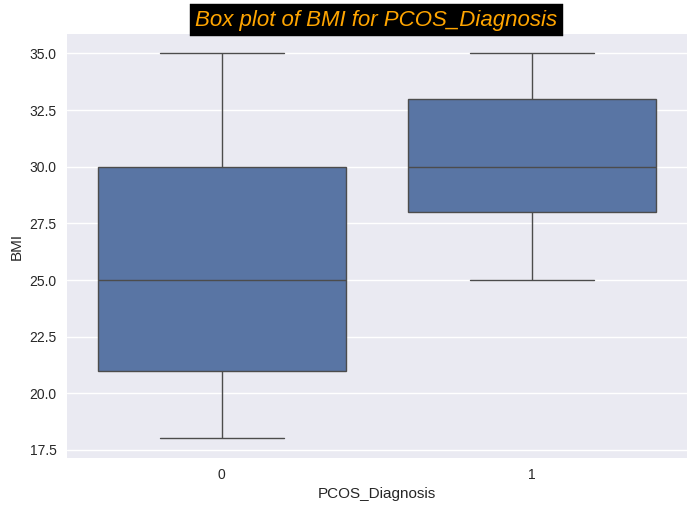

In [19]:
for col in ['Menstrual_Irregularity', 'PCOS_Diagnosis']: # Changed 'PCOS_diagnosis' to 'PCOS_Diagnosis'
    sns.boxplot(data=df, x=col, y='BMI')
    plt.title(f'Box plot of BMI for {col}', fontdict=font)
    plt.show()

##4.3. Análisis Multivariable

In [20]:
import plotly.express as px
import plotly.io as pio

# Configura el renderizador predeterminado de Plotly para Colab
pio.renderers.default = 'colab'

# Crea la figura 3D
fig = px.scatter_3d(
    data_frame=df,
    x='Testosterone_Level(ng/dL)',
    y='BMI',
    z='Menstrual_Irregularity',
    color='PCOS_Diagnosis',
    template='ggplot2',
    opacity=0.6,
    height=700,
    title='3d scatter basado en Nivel de testosterona, BMI, Regularidad de Periodo Menstrual y Diagnósticos'
)

# Muestra la figura
fig.show()

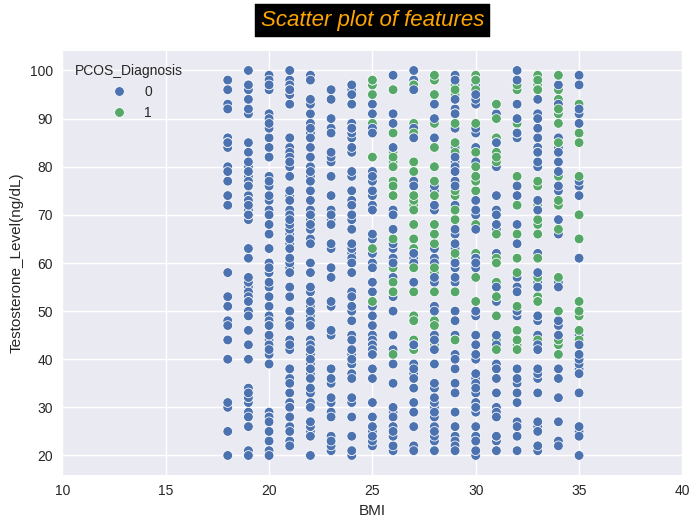

In [21]:
%matplotlib inline
# check feature correlation
sns.scatterplot(data=df,x='BMI', y='Testosterone_Level(ng/dL)', hue='PCOS_Diagnosis',)
plt.title('Scatter plot of features', y=1.04, fontdict=font)
plt.xticks(np.arange(10,45,5))
plt.show()

In [22]:
results=pd.pivot_table(data=df, index='PCOS_Diagnosis', columns='Menstrual_Irregularity', values='BMI')
results.style.background_gradient(cmap='summer_r')

Menstrual_Irregularity,0,1
PCOS_Diagnosis,,
0,26.278132,24.448485
1,31.000000,30.147368


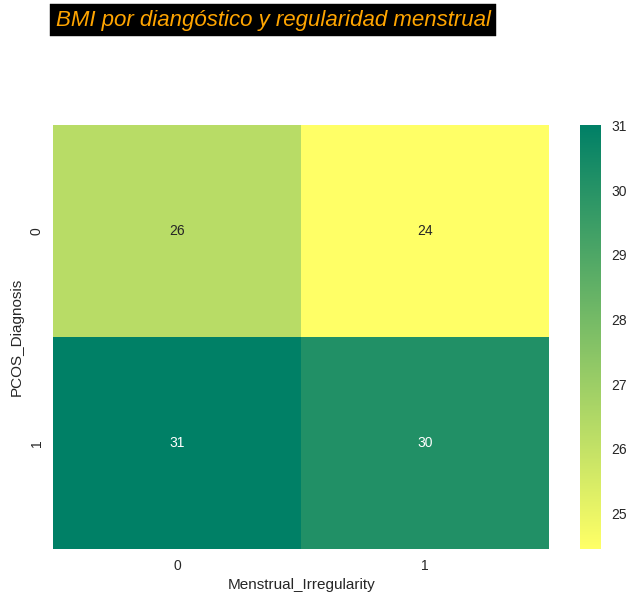

In [23]:
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('BMI por diangóstico y regularidad menstrual', y=1.09, x=0.4, **font)
plt.show()

In [24]:
results=pd.pivot_table(data=df, index='PCOS_Diagnosis', columns='Menstrual_Irregularity', values='Testosterone_Level(ng/dL)')
results.style.background_gradient(cmap='summer_r')

Menstrual_Irregularity,0,1
PCOS_Diagnosis,,
0,59.169851,56.075758
1,64.888889,69.778947


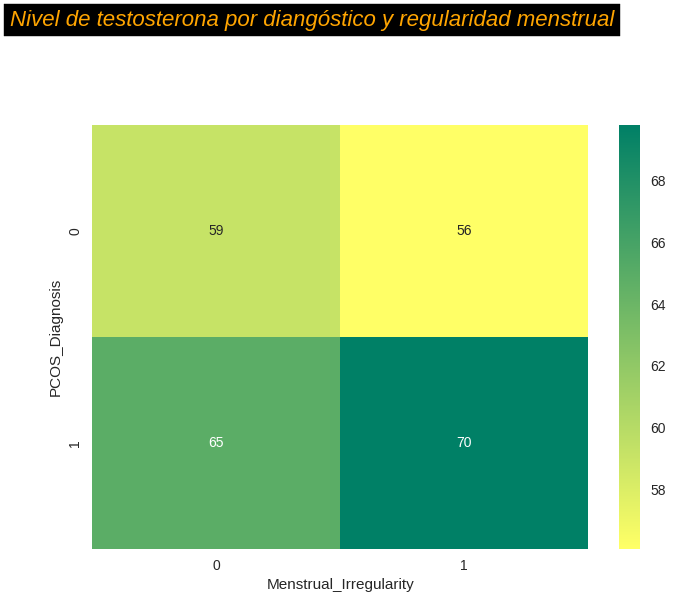

In [25]:
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('Nivel de testosterona por diangóstico y regularidad menstrual', y=1.09, x=0.4, **font)
plt.show()

In [26]:
results=pd.pivot_table(data=df, index='PCOS_Diagnosis', columns='Menstrual_Irregularity', values='Age')
results.style.background_gradient(cmap='summer_r')

Menstrual_Irregularity,0,1
PCOS_Diagnosis,,
0,31.452229,32.887879
1,33.555556,30.536842


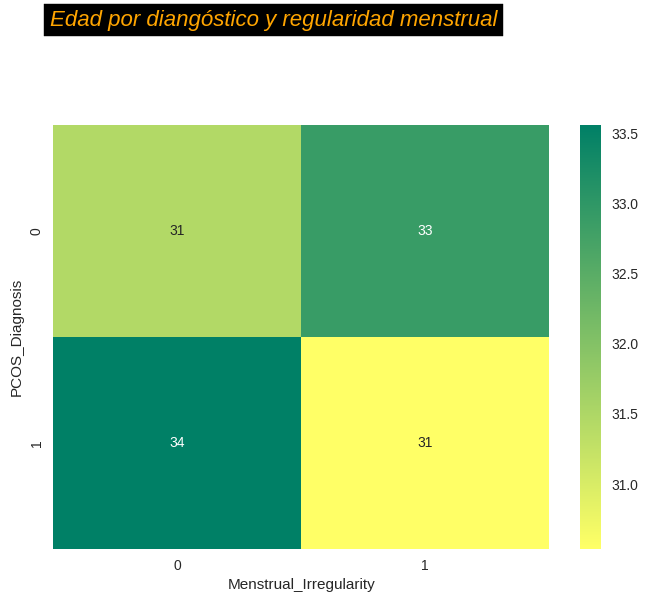

In [27]:
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('Edad por diangóstico y regularidad menstrual', y=1.09, x=0.4, **font)
plt.show()

In [28]:
results=pd.pivot_table(data=df, index='PCOS_Diagnosis', columns='Menstrual_Irregularity', values='Antral_Follicle_Count')
results.style.background_gradient(cmap='summer_r')

Menstrual_Irregularity,0,1
PCOS_Diagnosis,,
0,17.210191,16.196970
1,20.888889,20.157895


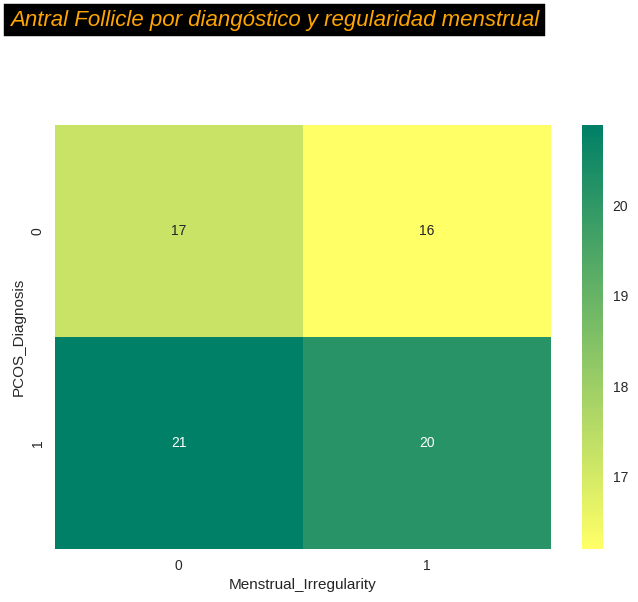

In [29]:
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('Antral Follicle por diangóstico y regularidad menstrual', y=1.09, x=0.4, **font)
plt.show()

##Visualizacion de datos

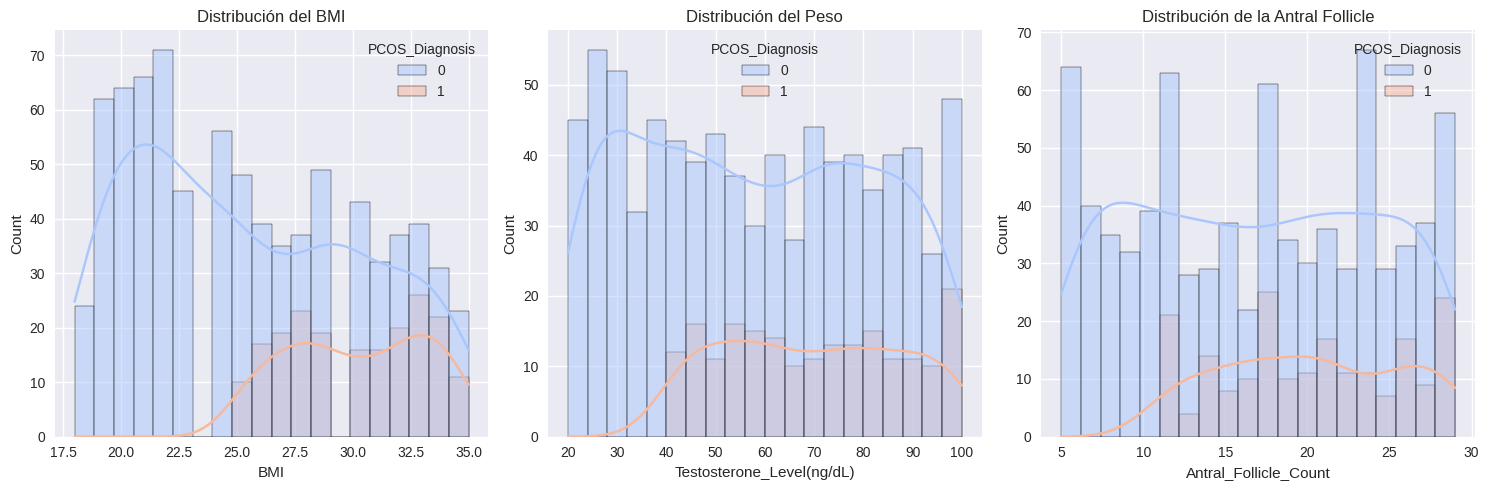

In [30]:
#Graficamos .a distribucion de cada característica
plt.figure(figsize=(15, 5))

#Histograma de BMI
plt.subplot(1, 3, 1)
sns.histplot(df, x="BMI", hue="PCOS_Diagnosis", kde=True, bins=20, palette="coolwarm")
plt.title("Distribución del BMI")

#Histograma de testosterona
plt.subplot(1, 3, 2)
sns.histplot(df, x="Testosterone_Level(ng/dL)", hue="PCOS_Diagnosis", kde=True, bins=20, palette="coolwarm")
plt.title("Distribución del Peso")

#Histograma de edad
plt.subplot(1, 3, 3)
sns.histplot(df, x="Antral_Follicle_Count", hue="PCOS_Diagnosis", kde=True, bins=20, palette="coolwarm")
plt.title("Distribución de la Antral Follicle")

plt.tight_layout()
plt.show()

##División en conjunto entrenamiento y prueba

In [31]:
#Definimos características y etiquetas
X = df[['BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count','Age']]
y = df['PCOS_Diagnosis']

#Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16, random_state = 42)

##Entrenamiento del modelo de Naive Bayes

In [32]:
#Creamos el modelo
modelo = GaussianNB()

#Entrenamos el modelo con los datos
modelo.fit(X_train, y_train)

GaussianNB()

##Predicciones y evaluación

In [33]:
#Realizamos predicciones en el conjunto de pruebas
y_pred = modelo.predict(X_test)

#Calculamos la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy}')

#Matriz de confuion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusion: \n', conf_matrix)

#Reporte de clasificacion
print('Reporte de clasificacion: \n', classification_report(y_test, y_pred))

Exactitud del modelo: 0.84375
Matriz de confusion: 
 [[122   8]
 [ 17  13]]
Reporte de clasificacion: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       130
           1       0.62      0.43      0.51        30

    accuracy                           0.84       160
   macro avg       0.75      0.69      0.71       160
weighted avg       0.83      0.84      0.83       160



- LA EXACTITUD DEL MODELO ESTÁ SOBRE 80%, ES UN **BUEN** MODELO.

##Matriz de confusión

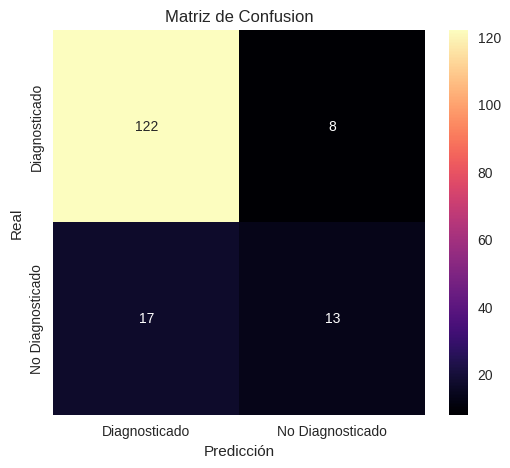

In [34]:
#Graficamos la matriz de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=['Diagnosticado', 'No Diagnosticado'], yticklabels=['Diagnosticado', 'No Diagnosticado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusion')
plt.show()

- Verdaderos Positivos (TP): **122** (Casos **correctamente diagnosticados** como positivos)
- Falsos Negativos (FN): **8** (Casos diagnosticados como negativos, pero que realmente eran positivos)
- Falsos Positivos (FP): **17** (Casos diagnosticados como positivos, pero que realmente eran negativos)
- Verdaderos Negativos (TN): **13** (Casos **correctamente diagnosticados** como negativos)